# Business Use Case

**There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.**


# Project Description

**Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.**


# About The Dataset

**The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.**


# Dataset Attributes

Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign


# Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
#Importing the necessory libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import joblib

from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Train Dataset

In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

df_train.head(10)   #Displaying the first 10 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


# Test Dataset

In [3]:
df_test=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

df_test.head(10) #Displaying the first 10 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


**==>This dataset(Train and Test) is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.**

**==>This datasets(Train and Test) have both numerical(continous) and categorical data**

**==>In Train Dataset,"subscribed" is the target variable,other than all are independent variables.**

**==>We have to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.**

# Exploratory Data Analysis (EDA)

In [4]:
#checking the dimension and Columns of the train and test dataset

print(f"The rows and columns in the training dataset: {df_train.shape}")
print(f"\nThe column headers in the training dataset: {df_train.columns}")

print(f"\n\nThe rows and columns in the test dataset: {df_test.shape}")
print(f"\nThe column headers in the test dataset: {df_test.columns}")

The rows and columns in the training dataset: (31647, 18)

The column headers in the training dataset: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


The rows and columns in the test dataset: (13564, 17)

The column headers in the test dataset: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


**==>Train Dataset contains 31647 rows and 18 Columns(from this subscribed column is our target variable ,then others are independent variables)**

**==>Test Dataset contains 13564 rows and 17 Columns(It doesn't have target variable ,then others are independent variables)**

### Train Dataset Info

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


**This Train dataset contains**

**==>8 int64 value columns**

**==>10 object value columns**

## Test Dataset Info

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


**This Train dataset contains**

**==>8 int64 value columns**

**==>9 object value columns**

**Both of the Dataset doesn't have Null Values**

# Missing Values

In [7]:
#Checking the null values

missing_val=df_train.isnull().sum().to_frame("Missing in Train Dataset")

missing_val["Missing in Test Dataset"]=df_test.isnull().sum()

missing_val

,Missing in Train Dataset,Missing in Test Dataset
ID,0,0.0
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0


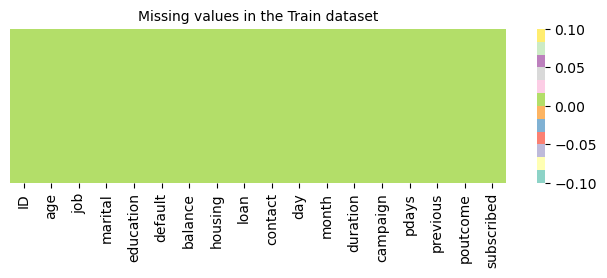

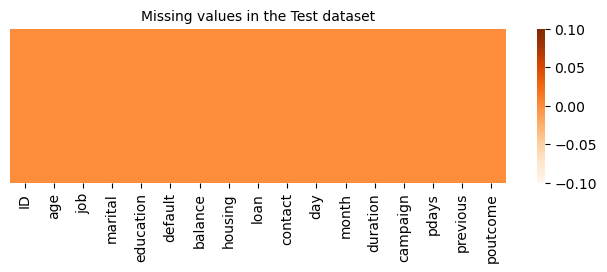

In [8]:
#Let's visualize missing values for train dataset using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='Set3')
plt.title('Missing values in the Train dataset', fontsize=10);


#Let's visualize missing values for test dataset using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='Oranges')
plt.title('Missing values in the Test dataset', fontsize=10);


**Both of the Datasets doesn't have null values**

# Unique Values

In [9]:
unique_values=df_train.nunique().to_frame("No.of Train unique Values")
unique_values["No.of Test unique Values"]=df_test.nunique()

unique_values

,No.of Train unique Values,No.of Test unique Values
ID,31647,13564.0
age,76,75.0
job,12,12.0
marital,3,3.0
education,4,4.0
default,2,2.0
balance,6326,4292.0
housing,2,2.0
loan,2,2.0
contact,3,3.0


**From above analysis(unique values)**

**1)Id has same unique values as the dataset rows,this column only help to identify the record of the person but does'nt influence the target variable,so we can drop it**

**2)The dataset contains the following categorical variables: job(12), marital(3), education(4), default(2), housing(2), loan(2), contact(3), month(12), poutcome(4), and subscribe(2) with its respective unique values.**

**3)The numerical columns in the dataset are age, balance, day, duration, campaign, pdays, and previous.**

# Dropping The Column

**Reason for dropping the column mentioned previously**

### Train Dataset

In [10]:
df_train.drop(['ID'], axis=1, inplace=True)

In [11]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Test Dataset

In [12]:
df_test.drop(['ID'], axis=1, inplace=True)

In [13]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [14]:
#checking the new dimension and Columns of the train and test dataset

print(f"The rows and columns in the train dataset: {df_train.shape}")



print(f"The rows and columns in the test dataset: {df_test.shape}")

The rows and columns in the train dataset: (31647, 17)
The rows and columns in the test dataset: (13564, 16)


# Categorical variables unique values

In [15]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df_train.dtypes.index:
    if df_train.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [16]:
# Checking the value counts of the categorical independent variables
for col in categorical_col:
    display(df_train[col].value_counts())

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

default
no     31062
yes      585
Name: count, dtype: int64

housing
yes    17584
no     14063
Name: count, dtype: int64

loan
no     26516
yes     5131
Name: count, dtype: int64

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

subscribed
no     27932
yes     3715
Name: count, dtype: int64

**This all are unique value for Categorical columns**

# Numerical variables unique values

In [17]:
# Checking the value counts of the categorical independent variables
for col in numerical_col:
    display(df_train[col].value_counts())

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64

balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64

day
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: count, dtype: int64

duration
90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: count, Length: 1454, dtype: int64

campaign
1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: count, dtype: int64

pdays
-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: count, Length: 509, dtype: int64

previous
0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: count, dtype: int64

**This all are unique value for Numerical columns**

# Summary statistics of the numerical variables

In [18]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**1)There is negative value presented in balance and pdays**

**2)There is no missing values**

**3)The mean value is greater than the median(50%) in balance, duration, pdays, age, campaign, previous columns which means the data is skewed to right.**

**4)the mean value less than the median in day which means the data is skewed to the left.**

**5)There is a huge difference between 75% and max in balance, duration, pdays, previous, campaign, age columns hence there are outliers present in the data.**

**6)we can also notice the**

**==>standard deviation**

**==>min**

**==>25% percentile value for all column from this describe method.**

# Summary statistics of the categorical variables

In [19]:
df_train.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


**Here we can see the number of unique values for each categorical variable as well as the most frequent value.**

# Checking for duplicated rows

In [20]:
print("Total no. of duplicated rows:",df_train.duplicated().sum())

Total no. of duplicated rows: 0


# Data Visualisation(Graphical Analysis)

# Univarite Analysis

### Target feature

,count
subscribed,
no,27932
yes,3715


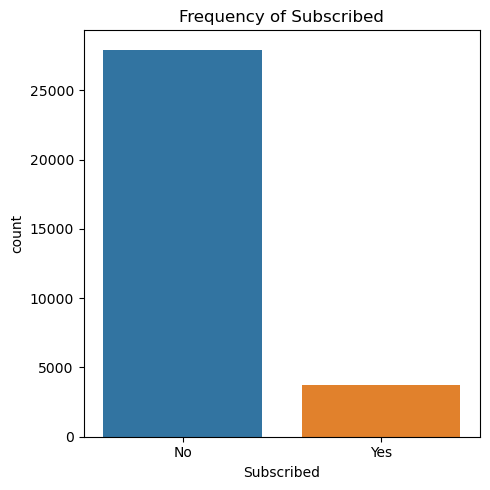

In [21]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='subscribed',data=df_train)
plt.xlabel("Subscribed")
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title('Frequency of Subscribed')
plt.tight_layout()

df_train['subscribed'].value_counts().to_frame()

**Out of 31647 passengers,only 3715 have subscribed .The target variable is imbalanced**

# Categorical Columns

In [22]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

## job

,count
job,
blue-collar,6842
management,6639
technician,5307
admin.,3631
services,2903
retired,1574
self-employed,1123
entrepreneur,1008
unemployed,905


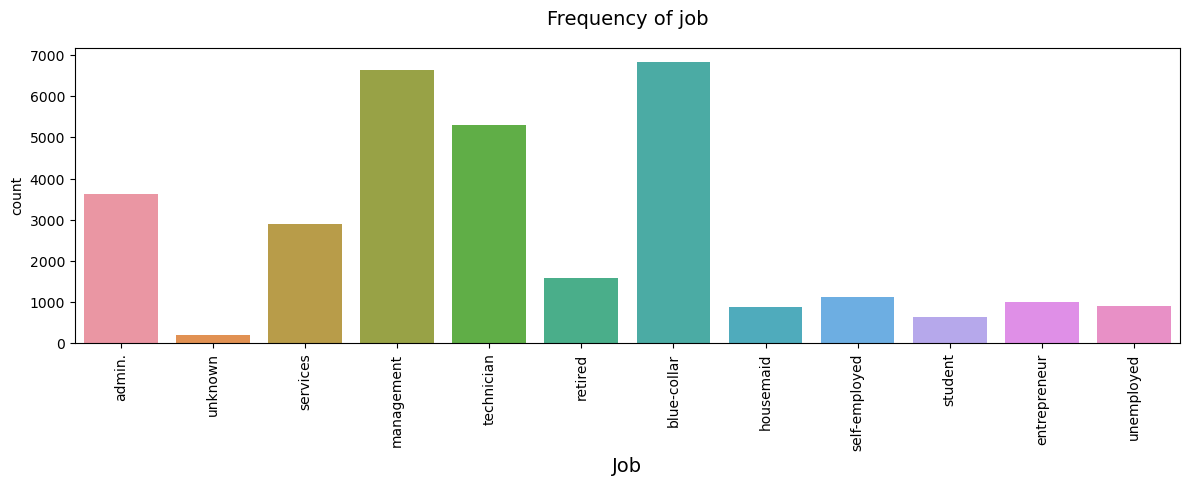

In [23]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='job',data=df_train)
plt.xlabel("Job",size=14, y=1.05)
plt.xticks(rotation=90)
plt.title('Frequency of job',size=14, y=1.05)
plt.tight_layout()

df_train['job'].value_counts().to_frame()

**Most of the data is covered by blue-collar(6842), management(6639), and technicians(5307). The students(635) are the least significant group in the dataset without considering the unknown group(206).**

## marital

,count
marital,
married,19095
single,8922
divorced,3630


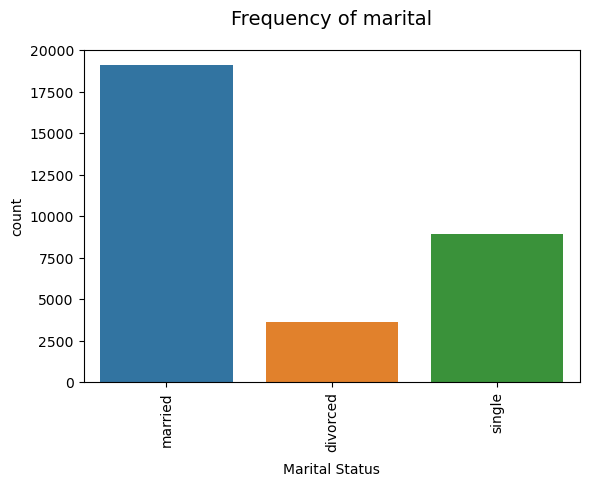

In [24]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='marital',data=df_train)
plt.xlabel('Marital Status', size=10, labelpad=8)
plt.xticks(rotation=90)
plt.title('Frequency of marital',size=14, y=1.05)
plt.tight_layout()

df_train['marital'].value_counts().to_frame()

**19095 of the dataset corresponds to married clients, 8922
divorced	3630 to single clients, and 3630 to divorce clients**

# education

,count
education,
secondary,16224
tertiary,9301
primary,4808
unknown,1314


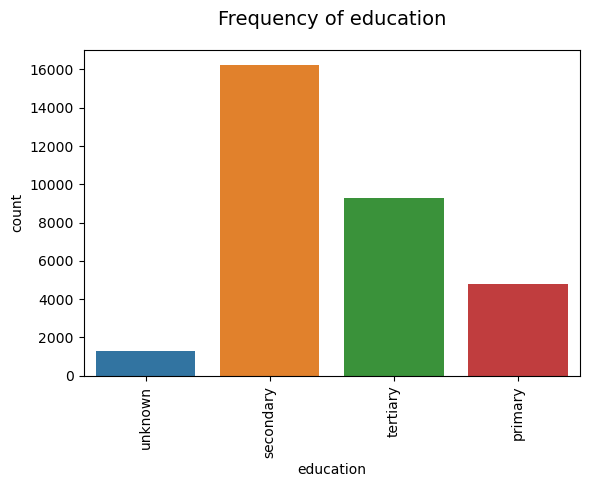

In [25]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='education',data=df_train)
plt.xticks(rotation=90)
plt.title('Frequency of education',size=14, y=1.05)
plt.tight_layout()

df_train['education'].value_counts().to_frame()

**More than 50% of the dataset have secondary education. There is a 1314 unknown data.**

# default

,count
default,
no,31062
yes,585


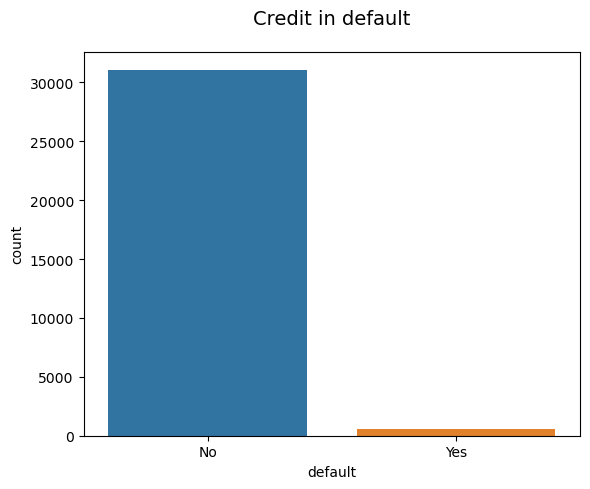

In [26]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='default',data=df_train)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title('Credit in default',size=14, y=1.05)
plt.tight_layout()

df_train['default'].value_counts().to_frame()

**Only 585 of the dataset has their credit in default.**

# housing

,count
housing,
yes,17584
no,14063


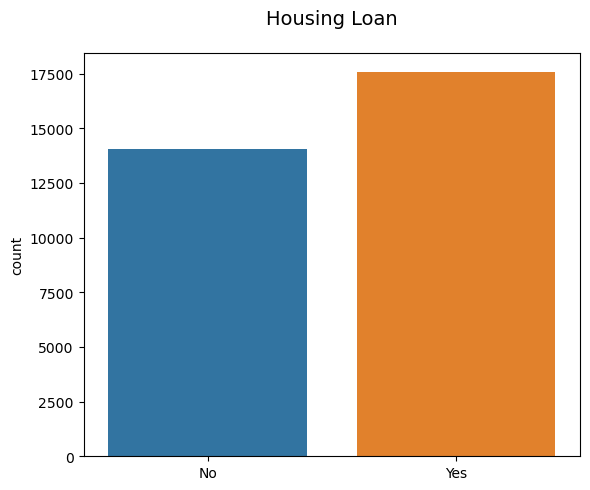

In [27]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='housing',data=df_train)
plt.xlabel('', size=10, labelpad=8)
plt.title(f"Housing Loan", size=14, y=1.05)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.tight_layout()

df_train['housing'].value_counts().to_frame()

**17584 of the dataset has a housing loan.**

# loan

,count
loan,
no,26516
yes,5131


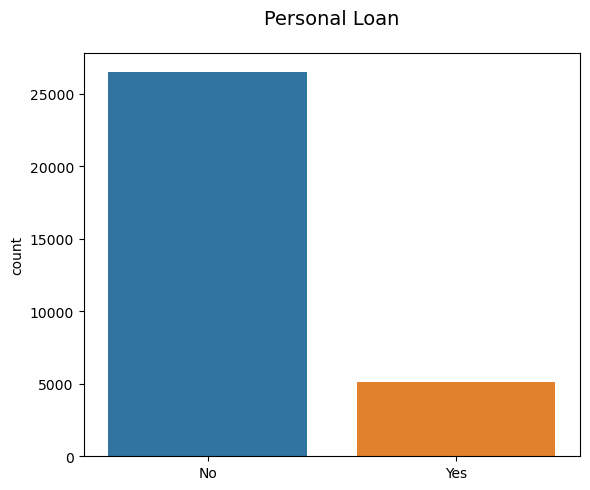

In [28]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='loan',data=df_train)
plt.xlabel('', size=10, labelpad=8)
plt.title(f"Personal Loan", size=14, y=1.05)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.tight_layout()

df_train['loan'].value_counts().to_frame()

**5131 of the dataset has a personal loan.**

# contact

,count
contact,
cellular,20423
unknown,9177
telephone,2047


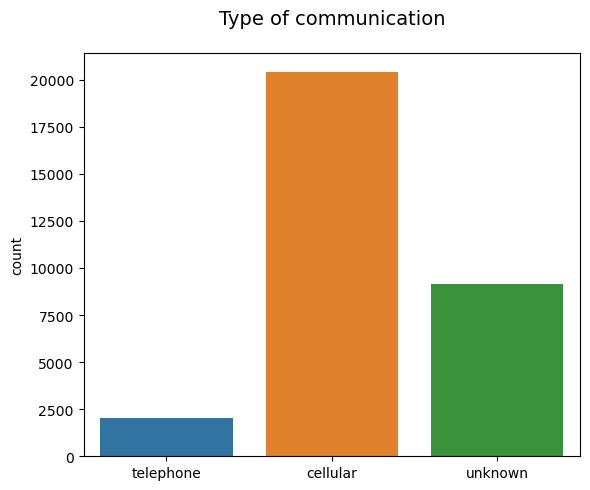

In [29]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='contact',data=df_train)
plt.xlabel('', size=10, labelpad=8)
plt.title(f"Type of communication", size=14, y=1.05)
plt.tight_layout()

df_train['contact'].value_counts().to_frame()

**20423 of the dataset was contacted last time by cellular, 9177 by telephone, and there is 9177 unknown**

# month

,count
month,
may,9669
jul,4844
aug,4333
jun,3738
nov,2783
apr,2055
feb,1827
jan,977
oct,512


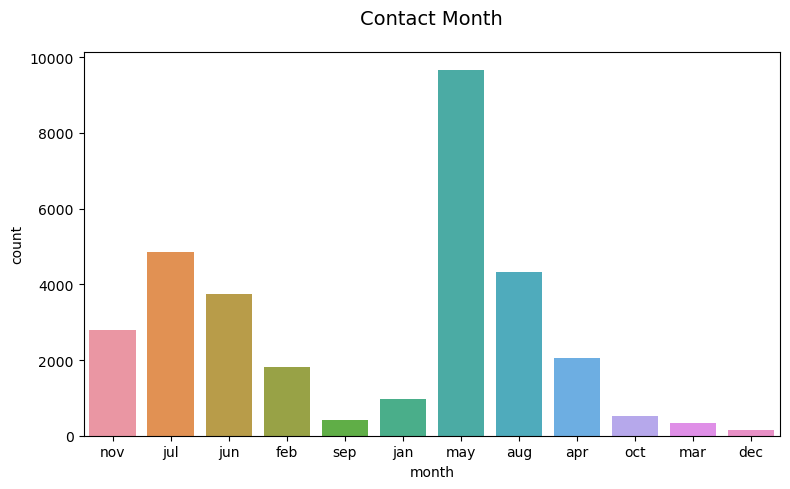

In [30]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='month',data=df_train)
plt.title(f"Contact Month", size=14, y=1.05)
plt.tight_layout()

df_train['month'].value_counts().to_frame()

**The months with the greatest contact with clients are May, June, July and August.**

# poutcome

,count
poutcome,
unknown,25929
failure,3362
other,1288
success,1068


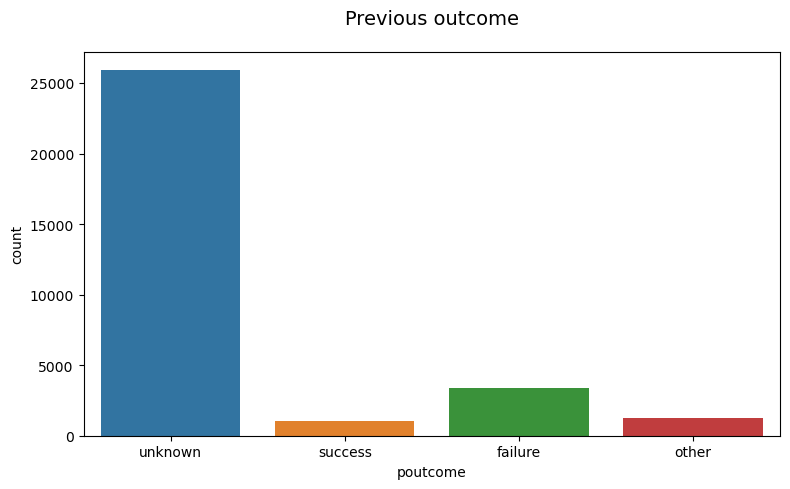

In [31]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='poutcome',data=df_train)
plt.title(f"Previous outcome", size=14, y=1.05)
plt.tight_layout()

df_train['poutcome'].value_counts().to_frame()

**In the previous marketing campaign there were a 1068 of success and 3362 of failure. But 25929 of the result is unknown.**

# Numerical Columns

In [32]:
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# age

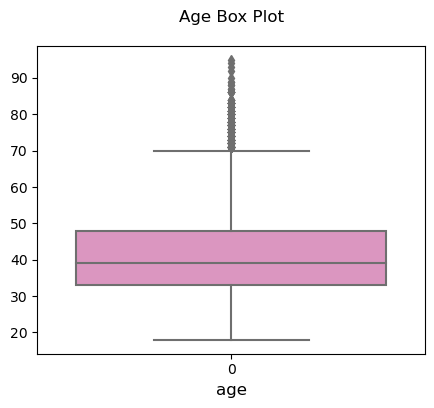

In [33]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['age'],palette="Set2_r")
plt.xlabel('age',fontsize=12)
plt.title('Age Box Plot', size=12, y=1.05)
plt.show()

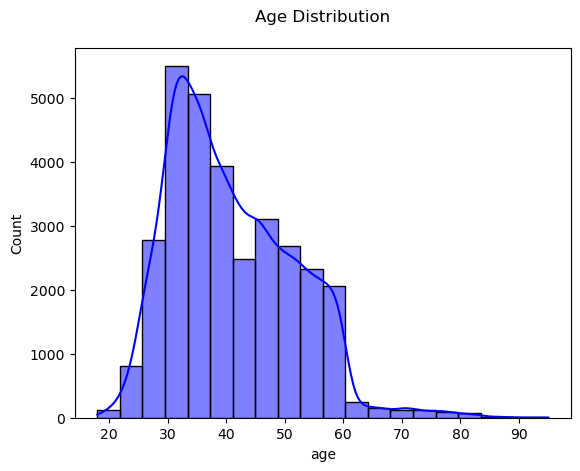

In [34]:
sns.histplot(df_train['age'],color='b',kde=True,bins=20)
plt.title('Age Distribution', size=12, y=1.05)
plt.show()

**The distribution of Age is skewed to the right. There are outliers present in the Box plot.**

# balance

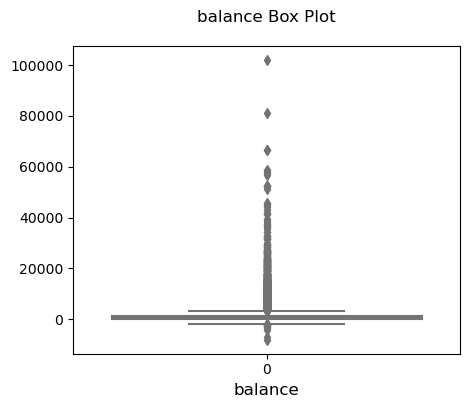

In [35]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['balance'],color='lightgreen')
plt.xlabel('balance',fontsize=12)
plt.title('balance Box Plot', size=12, y=1.05)
plt.show()

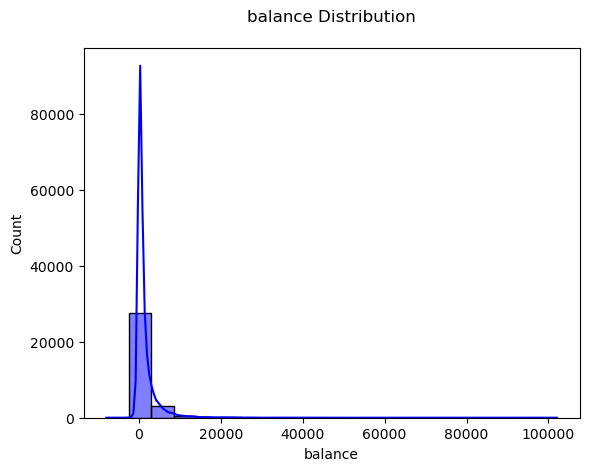

In [36]:
sns.histplot(df_train['balance'],color='b',kde=True,bins=20)
plt.title('balance Distribution', size=12, y=1.05)
plt.show()

**The distribution of balance is skewed to the right. There are outliers present in the Box plot.**

# day

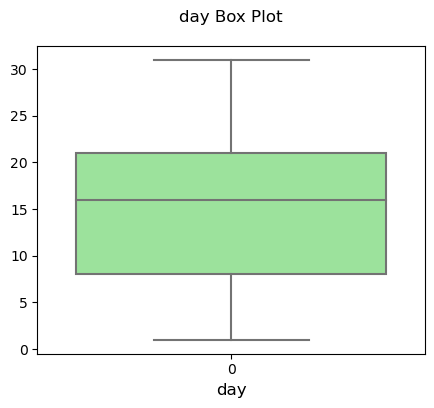

In [37]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['day'],color='lightgreen')
plt.xlabel('day',fontsize=12)
plt.title('day Box Plot', size=12, y=1.05)
plt.show()

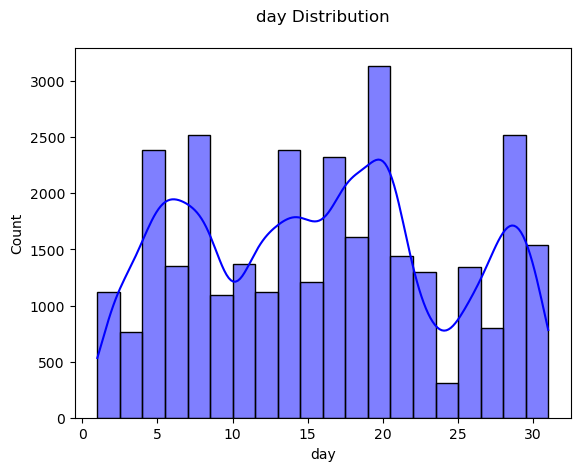

In [38]:
sns.histplot(df_train['day'],color='b',kde=True,bins=20)
plt.title('day Distribution', size=12, y=1.05)
plt.show()

**Day is slightly skewed to the left. There are no outliers present.**

# duration

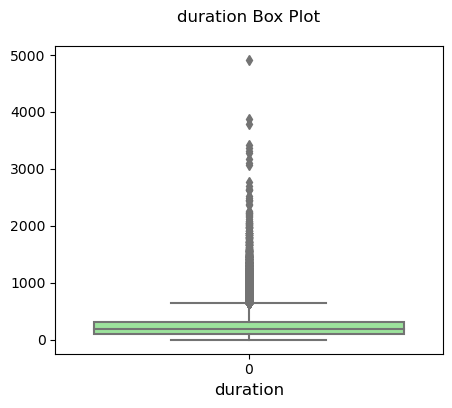

In [39]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['duration'],color='lightgreen')
plt.xlabel('duration',fontsize=12)
plt.title('duration Box Plot', size=12, y=1.05)
plt.show()

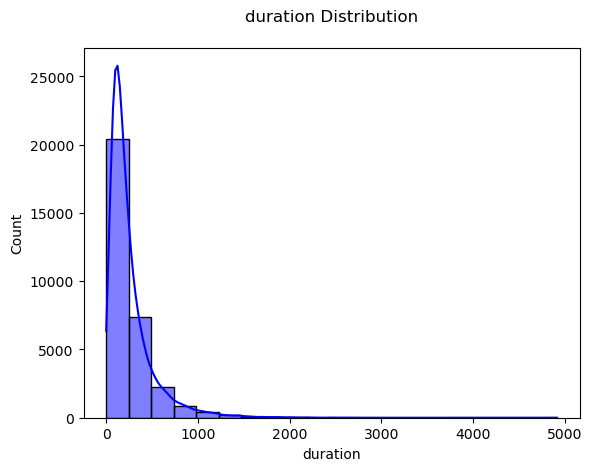

In [40]:
sns.histplot(df_train['duration'],color='b',kde=True,bins=20)
plt.title('duration Distribution', size=12, y=1.05)
plt.show()

**The distribution of duration is skewed to the right with the presence of outliers in the box plot.**

# campaign

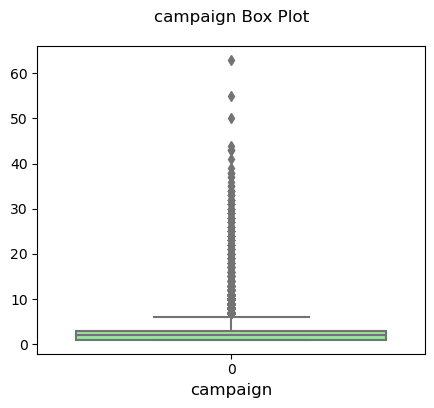

In [41]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['campaign'],color='lightgreen')
plt.xlabel('campaign',fontsize=12)
plt.title('campaign Box Plot', size=12, y=1.05)
plt.show()

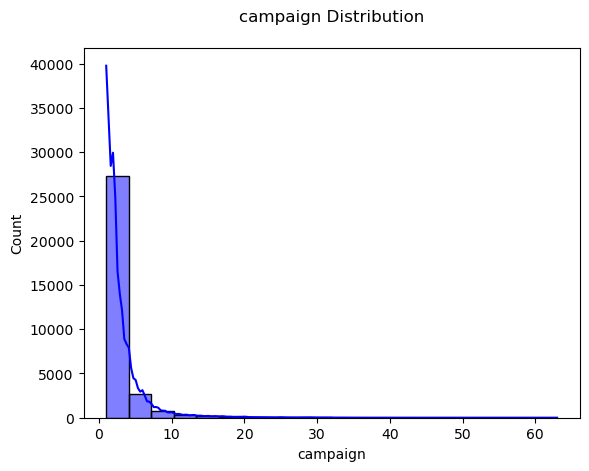

In [42]:
sns.histplot(df_train['campaign'],color='b',kde=True,bins=20)
plt.title('campaign Distribution', size=12, y=1.05)
plt.show()

**The distribution of campaign is skewed to the right with the presence of outliers in the box plot.**

# pdays

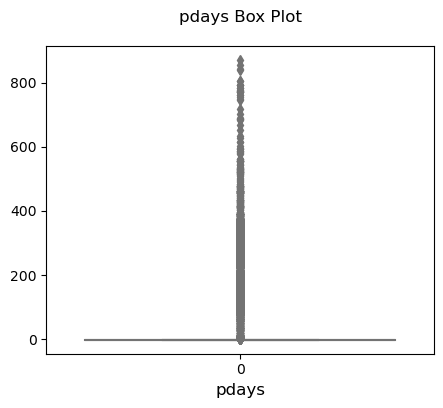

In [43]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['pdays'],color='lightgreen')
plt.xlabel('pdays',fontsize=12)
plt.title('pdays Box Plot', size=12, y=1.05)
plt.show()

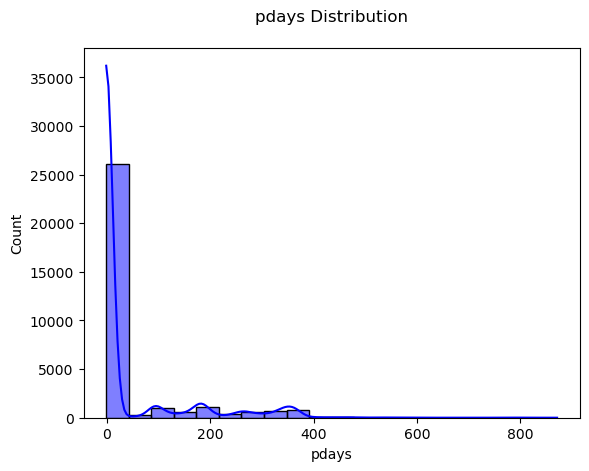

In [44]:
sns.histplot(df_train['pdays'],color='b',kde=True,bins=20)
plt.title('pdays Distribution', size=12, y=1.05)
plt.show()

**The distribution of pdays is skewed to the right. There are outliers present as we can see in the boxplot.**

# previous

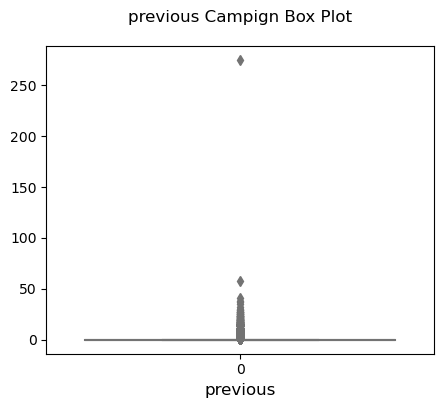

In [45]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(df_train['previous'],color='lightgreen')
plt.xlabel('previous',fontsize=12)
plt.title('previous Campign Box Plot', size=12, y=1.05)
plt.show()

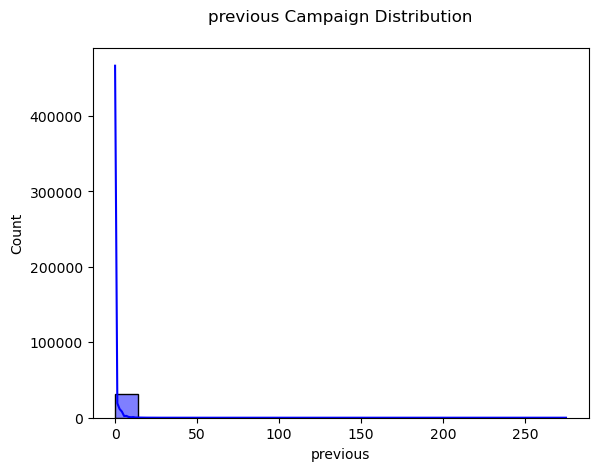

In [46]:
sns.histplot(df_train['previous'],color='b',kde=True,bins=20)
plt.title('previous Campaign Distribution', size=12, y=1.05)
plt.show()

**The distribution of previous is skewed to the right. There are outliers present as we can see in the boxplot.**

# Bivariate Analysis(comparing  Categorical feature with target variable)

## Job vs subscribed

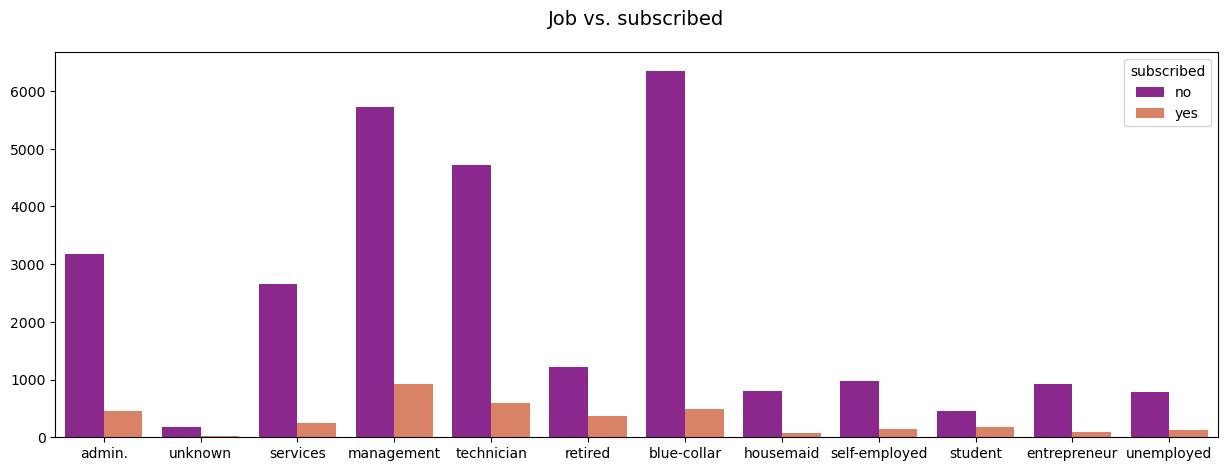

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Job vs. subscribed", size=14, y=1.05)
plt.show()

**The highest percentage of clients who subscribed to term the deposit belongs to the management group.**

## Marital status vs subscribed

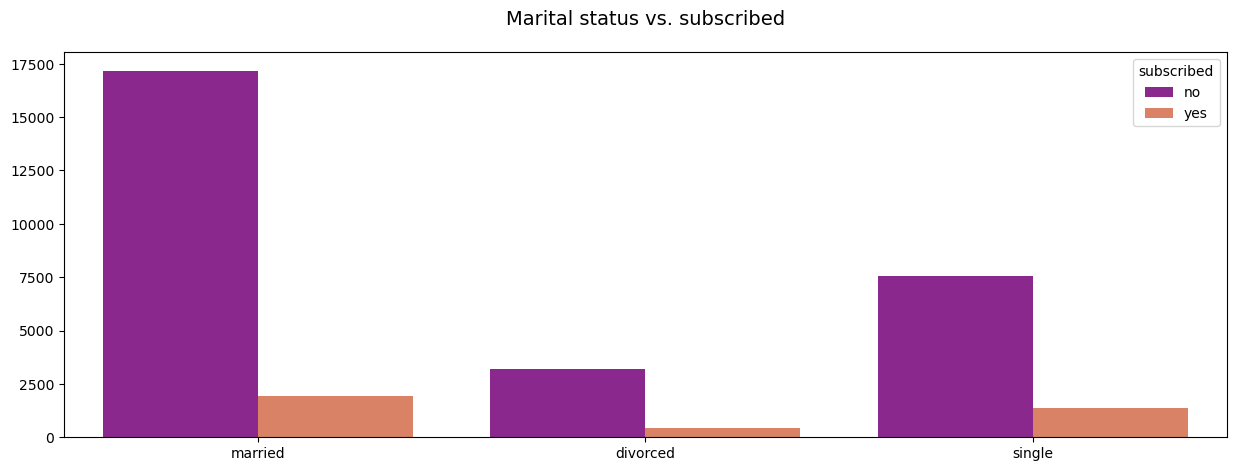

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Marital status vs. subscribed", size=14, y=1.05)
plt.show()

**The married group has the highest percentage of subscribed to term the deposit , then comes the single group.**

# Education vs subscribed

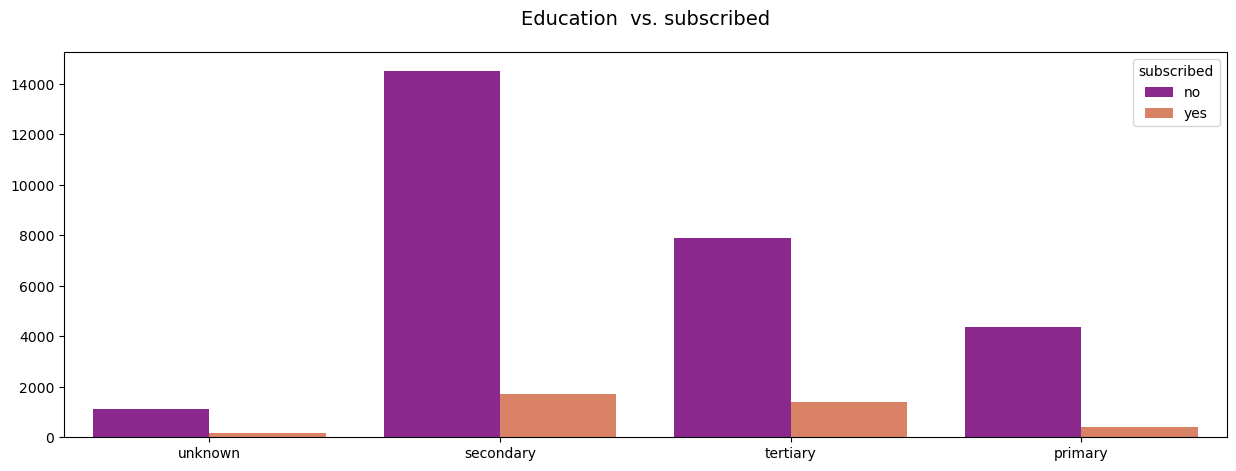

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x='education',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Education  vs. subscribed", size=14, y=1.05)
plt.show()

**The majority of clients who subscribe to the deposit to term are secondary or tertiary education.**

## default vs subscribed

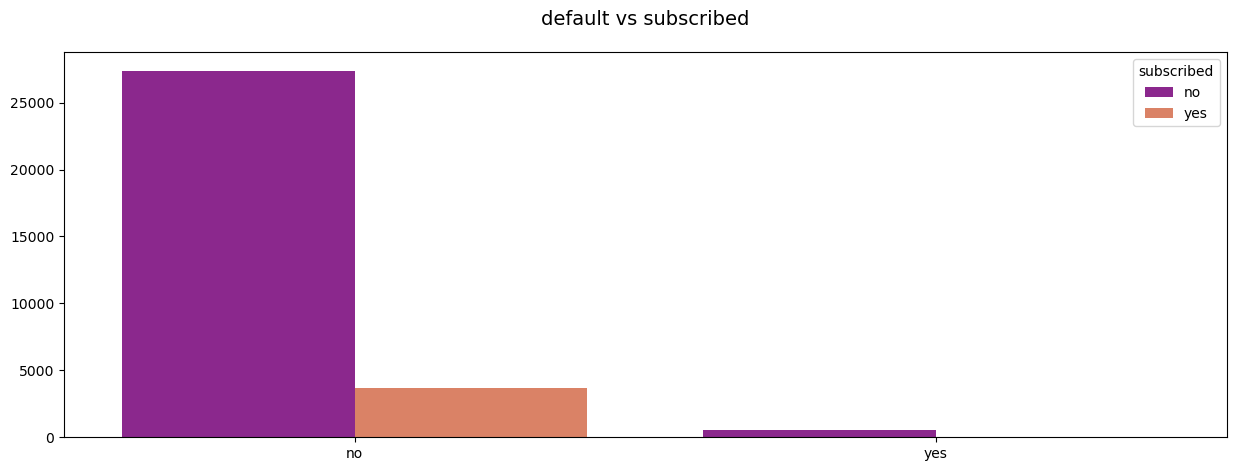

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='default',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"default vs subscribed", size=14, y=1.05)
plt.show()

**no credit in default have been subscribed to term the deposit.**

## housing vs subscribe

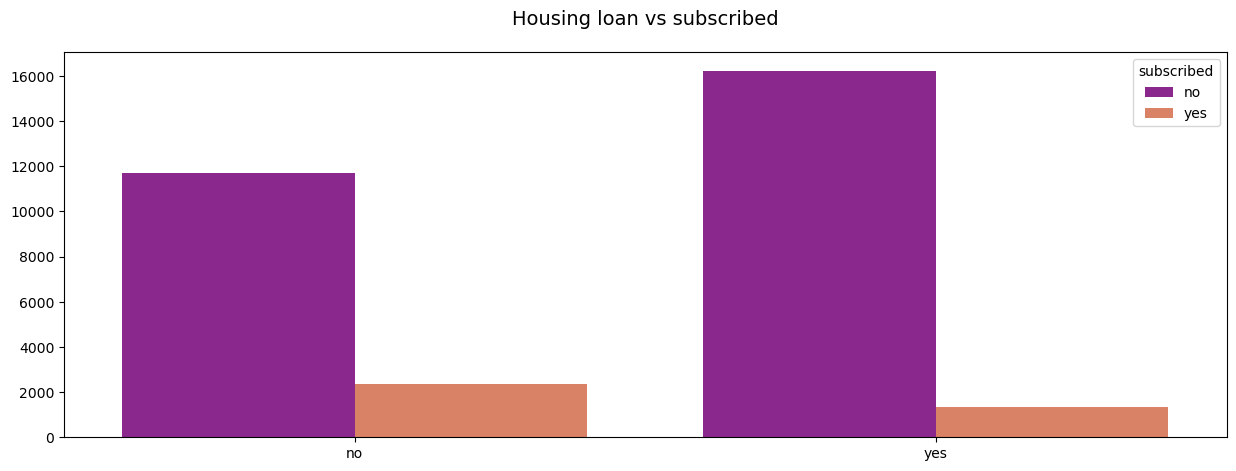

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(x='housing',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Housing loan vs subscribed", size=14, y=1.05)
plt.show()

**The most who have no housing loan have been subscribed to term the deposit.**

## loan vs subscribe

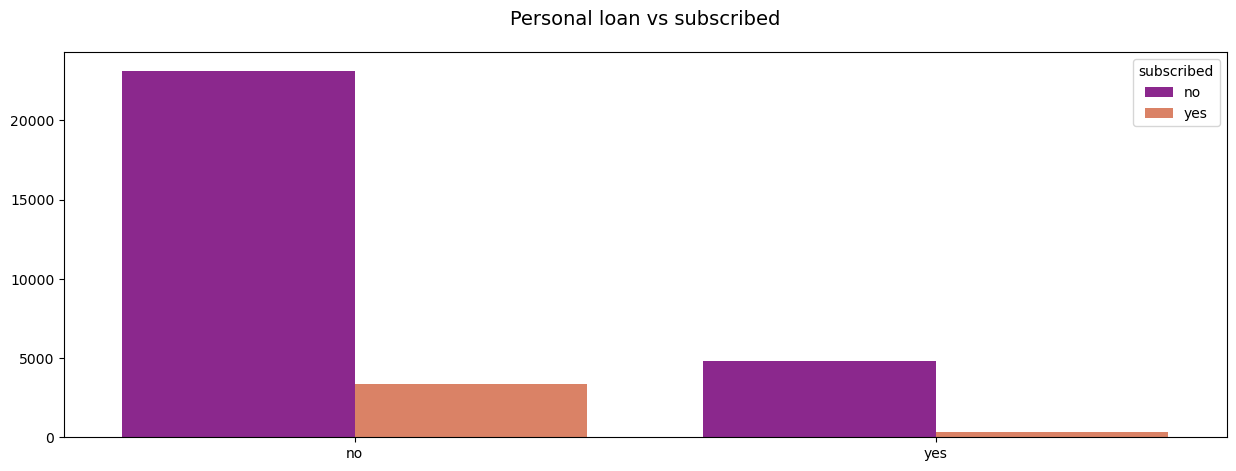

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x='loan',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Personal loan vs subscribed", size=14, y=1.05)
plt.show()

**The most who have no personal loan have been subscribed to term the deposit.**

## contact vs subscribe

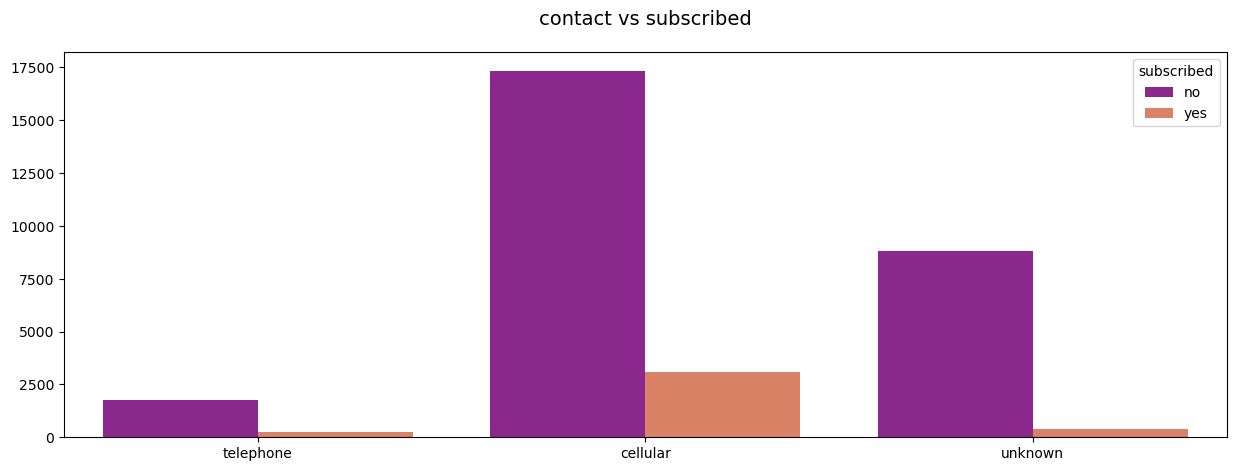

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(x='contact',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"contact vs subscribed", size=14, y=1.05)
plt.show()

**The group contacted by celluar has the highest percentage of subscribed to term the deposit.**

## month vs subscribe

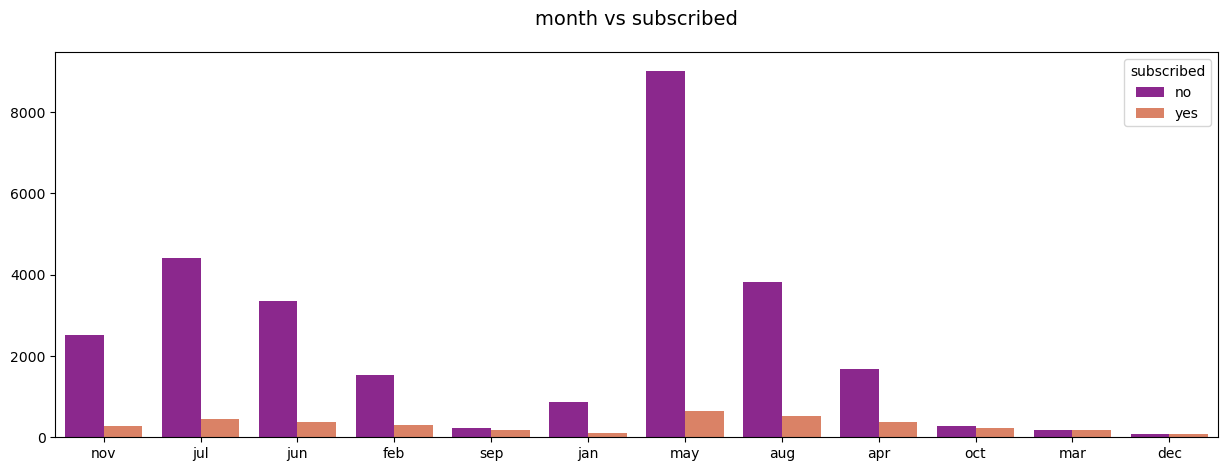

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"month vs subscribed", size=14, y=1.05)
plt.show()

**The highest percentage of subscribed to term the deposit is on may**

## poutcome vs subscribe

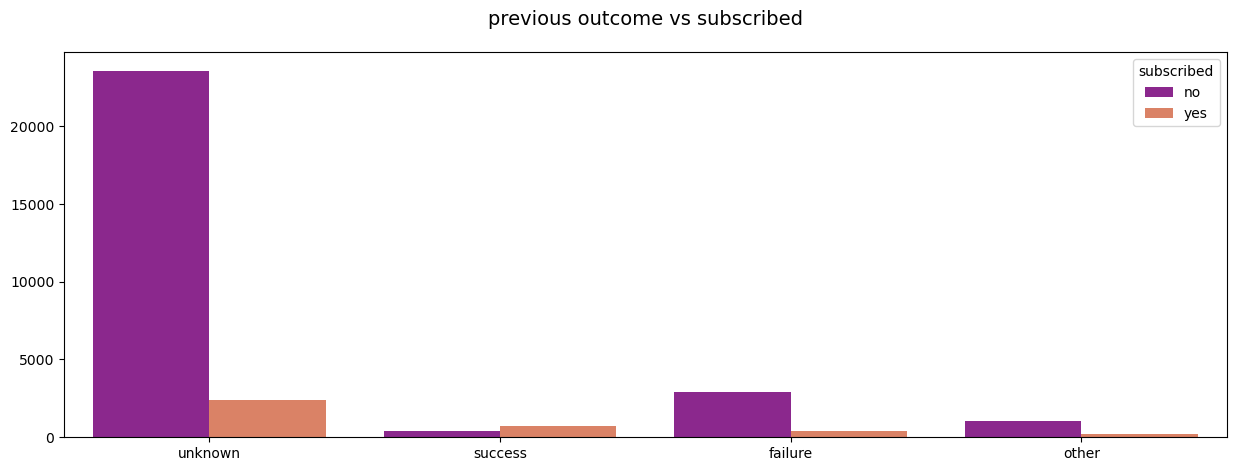

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome',data=df_train,palette='plasma',hue='subscribed')
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"previous outcome vs subscribed", size=14, y=1.05)
plt.show()

**The unknown group has the highest percentage of subscribed to term the deposit**

# Multivariate Analysis

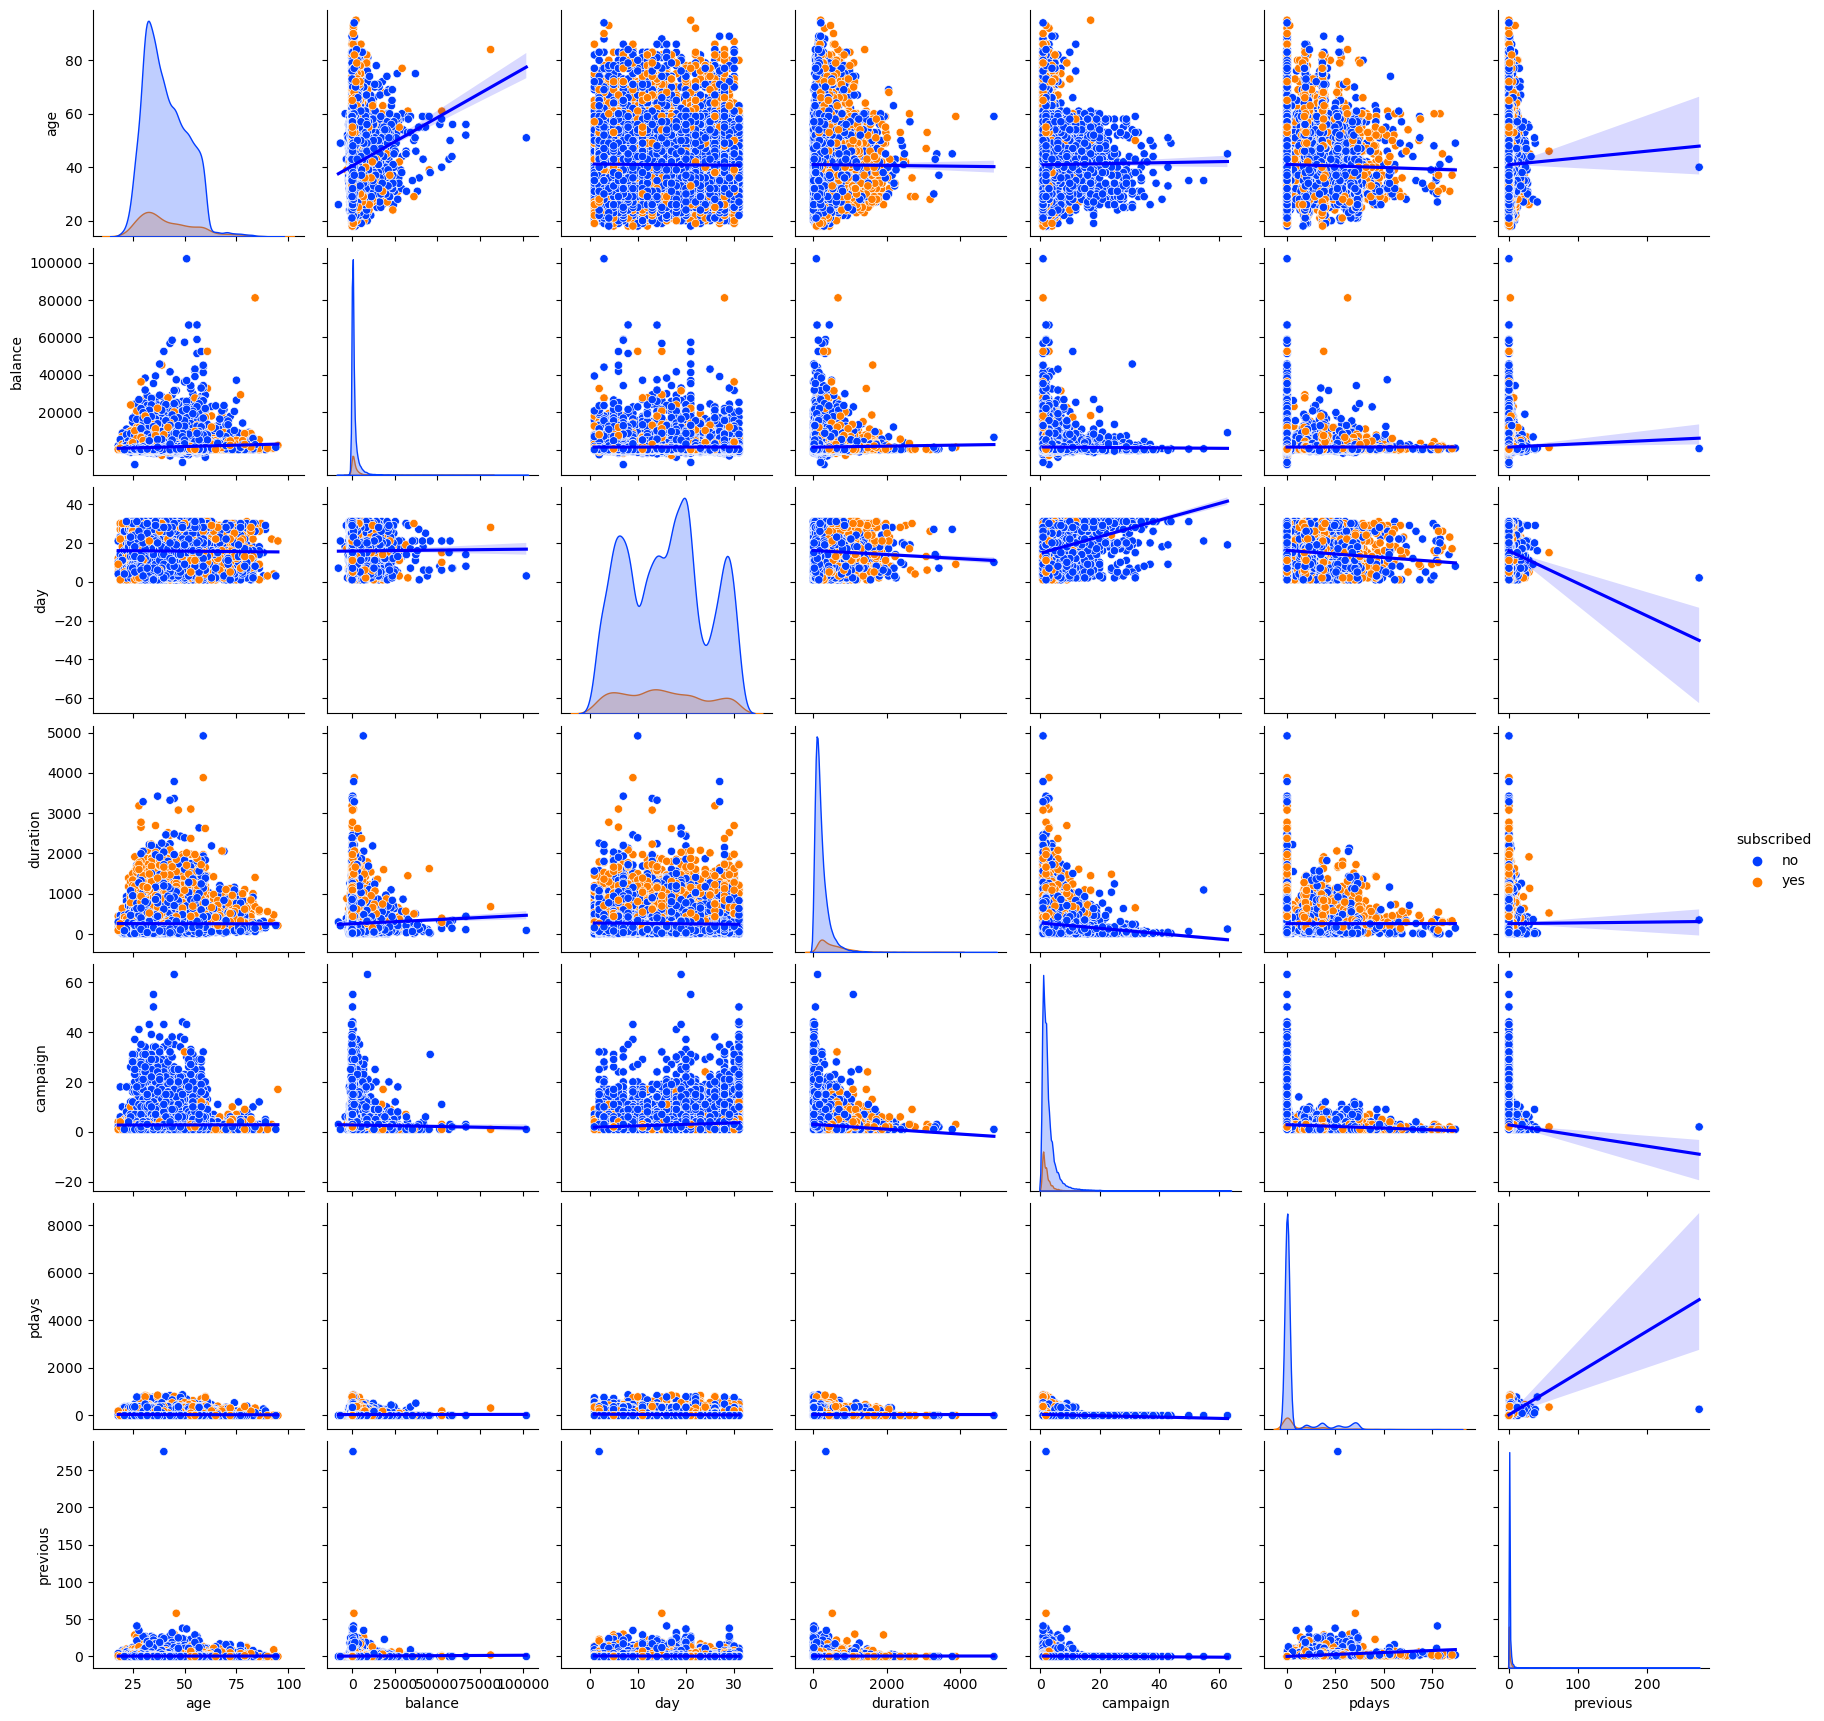

In [56]:
grid = sns.pairplot(df_train, hue = "subscribed", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_train, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

**There is a positive correlation between age and balance.**

# Encoding the target variable

In [57]:
df_train["subscribed"].unique()

array(['no', 'yes'], dtype=object)

In [58]:
df_train['subscribed'] = df_train['subscribed'].replace({'yes': 1, 'no': 0})
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


**Now we encoded the Target variable 1 for yes and 0 for no**

# Encoding Categorical features

In [59]:
# Encoding the yes/no features for train and test dataset.
for col in ['default', 'housing', 'loan']:
    df_train[col] = df_train[col].replace({'yes': 1, 'no': 0})
    df_test[col] = df_test[col].replace({'yes': 1, 'no': 0})

## Encoding the other features using OrdinalEncoder

In [60]:
OE = OrdinalEncoder()

for i in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    df_train[i] = OE.fit_transform(df_train[i].values.reshape(-1, 1))
    df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1, 1))

In [61]:
df_train.head() #Train dataset after Encoding

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0


In [62]:
df_test.head()  #Test dataset after Encoding

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0,118,1,0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0,2787,0,0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0,144,1,0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0,3777,1,0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0,-705,0,1,2.0,3,5.0,111,1,-1,0,3.0


# Correlation between target variable and independent variables.

In [63]:
df_train.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


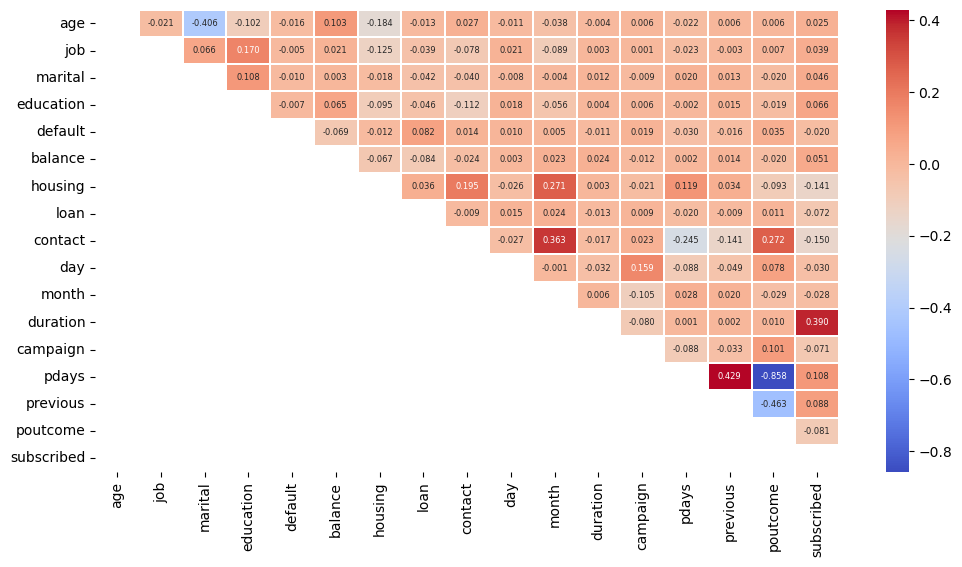

In [64]:
# Visualizing the correlation matrix by plotting heatmap

df_train_corr=df_train.corr()

lower_triangle=np.tril(df_train.corr())

plt.figure(figsize=(12,6))

sns.heatmap(df_train_corr,annot=True,annot_kws={"size":6},cmap='coolwarm',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)Subscribed(Target variable) and Pclass are positively correlated with a value of 0.390 (Moderate correlation).**

**3)pdays and previous are positively correlated with a value of 0.429 (Moderate correlation).**

**4)Month and contact are positively correlated with a value of 0.363 (Moderate correlation).**

**5)age and maritial are negatively correlated with a value of -0.406 (Moderate correlation).**

**6)poutcome and pdays are negatively correlated with a value of -0.858 (High correlation)**

# Data Preprocessing

# Removing outliers

In [65]:
z = np.abs(zscore(df_train))  #Zscore method for removing outliers
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [66]:
# threshold = 3
df_train= df_train[(z<3).all(axis=1)]

In [67]:
print(f"The rows and columns in the new training dataset: {df_train.shape}")

The rows and columns in the new training dataset: (27584, 17)


**In the new dataset there are 27584 rows and 17 columns.**

In [68]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0,2968,0,0,2.0,20,6.0,30,4,-1,0,3.0,0
31641,37,9.0,2.0,2.0,0,1309,0,0,2.0,6,6.0,442,2,-1,0,3.0,0
31642,29,4.0,2.0,2.0,0,0,1,0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,53,4.0,0.0,2.0,0,380,0,1,0.0,5,6.0,438,2,-1,0,3.0,1


**The outlier removal must be done only on the training set to preserve the integrity of the test data.**

# Skewness Correction

In [69]:
# Checking the skewness in the data
df_train_skew = df_train.skew().sort_values(ascending=False).to_frame("Skewness")
df_train_skew

,Skewness
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
age,0.439159
job,0.258302


In [70]:
df_train_skew[(df_train_skew['Skewness'] > 0.5) | (df_train_skew['Skewness'] < -0.5)] #the features with a skew > 0.5 or -0.5

,Skewness
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
poutcome,-2.449518


**Acceptance range for skewness is -0.5 to 0.5**

**Considering the skewness of the continuous numerical columns:**

**==>previous (3.657231)**

**==>pdays (2.799415)**

**==>balance (2.433928)**

**==>campaign (2.064222)**

**==>duration (1.596175)**

In [71]:
# Checking skewness using cuberoot method , log method and square root
skew_columns = ['previous', 'pdays', 'balance', 'campaign', 'duration']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_train[col])
    df_transformed[f"{col}_log"] = np.log(df_train[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_train[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_train[skew_columns]], axis=1)

In [72]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
previous_sqrt,2.535886
previous_log,NaN
previous_cbrt,2.275265
previous,3.657231
pdays_sqrt,-0.692272
pdays_log,-2.999089
pdays_cbrt,2.162491
pdays,2.799415
duration_sqrt,0.675282
duration_log,NaN


**==>cuberoot method give a better skewness for previous, balance, and duration.**

**==>log method is better for campaign.**

**==>square root method is better for pdays**


In [73]:
# Transform data  
for col in ['previous', 'balance', 'duration']:
    df_train[col] = np.cbrt(df_train[col])
    df_test[col] = np.cbrt(df_test[col])

# Square root transformation
df_train['pdays'] = np.sqrt(df_train['pdays'])
df_test['pdays'] = np.sqrt(df_test['pdays'])

# Log transformation
df_train['campaign'] = np.log(df_train['campaign'])
df_test['campaign'] = np.log(df_test['campaign'])

df_train.skew().sort_values(ascending=False).to_frame("Skewness after transformation")

,Skewness after transformation
subscribed,2.624756
previous,2.275265
loan,1.829242
contact,0.698882
campaign,0.598670
age,0.439159
duration,0.309191
job,0.258302
education,0.197092
day,0.075854


# Separating features and label

In [74]:
x=df_train.drop('subscribed',axis=1)
y=df_train['subscribed']

In [75]:
print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (27584, 16)
Label Dimension = (27584,)


# Feature Scaling using Standard Scalarization

In [76]:
scaler = StandardScaler()

# Scaling training data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Scaling testing data
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)


In [77]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.519669,-1.322283,-0.279034,2.374747,0.0,0.846574,-1.109257,-0.440582,0.362292,0.375999,1.173570,-1.436312,0.042756,NaN,-0.396028,0.380591
1,-0.957582,2.021767,-0.279034,-0.302260,0.0,-0.969735,-1.109257,-0.440582,-0.734204,0.495243,-0.162960,-0.816578,0.042756,NaN,-0.396028,0.380591
2,-1.353942,0.805749,-0.279034,-0.302260,0.0,0.379198,0.901504,-0.440582,-0.734204,0.256756,-0.162960,0.282839,-1.025667,NaN,-0.396028,0.380591
3,1.618759,-0.106265,-1.932500,1.036243,0.0,1.244238,-1.109257,-0.440582,-0.734204,0.733730,0.171173,2.409876,-1.025667,-1.128943,2.714652,-0.757057
4,-0.957582,1.413758,-0.279034,-0.302260,0.0,-0.396474,0.901504,-0.440582,-0.734204,-1.412654,-0.831225,0.941706,-1.025667,NaN,-0.396028,0.380591


In [78]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-1.770139,1.522962,NaN,-0.458201,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.760054,-0.992527,NaN,-0.458201,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.531969,0.031534,0.829938,1.655383,-0.992527,NaN,-0.458201,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.413763,-0.330440,0.829938,-1.031965,-0.019403,NaN,-0.458201,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.588278,-0.992527,NaN,-0.458201,0.452163


# Muticollinearity Analysis and Feature Selection

In [79]:
missing_values = x.isnull().sum()
missing_values

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        23678
previous         0
poutcome         0
dtype: int64

**After the standardization there are null values in pdays column, since this column has a low relationship with the target(clearly we can see in correlation heatmap) it will be removed.**

In [80]:
# Dropping pdays from training and testing dataset
x.drop(['pdays'], axis=1, inplace=True)
df_test.drop(['pdays'], axis=1, inplace=True)

# Checking Variance Inflation Factor (VIF)

In [81]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
13,previous,5.906580
14,poutcome,5.893314
8,contact,1.328901
10,month,1.277455
0,age,1.272157
2,marital,1.231070
6,housing,1.173386
3,education,1.068298
12,campaign,1.058887
1,job,1.050085


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10**

# Oversampling the data

In [82]:
y.value_counts()

subscribed
0    24762
1     2822
Name: count, dtype: int64

**Our target variable is imbalanced ,we have to balance the data**

In [83]:
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [84]:
x=x1
y=y1

In [85]:
y.value_counts()

subscribed
0    24762
1    24762
Name: count, dtype: int64

**Our target variable is balanced now**

# Modeling

# Finding the best random state

In [ ]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

**I ran this code many times the random state is 1 or 4 but once again if i run this code it take hours time so i directly mentioning  the random state as 1**

# Creating train test split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)

# Creating a Function with accuracy score,confusion matrix,classification report and difference between accuracy score and cross validation

In [88]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f" \n \n Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
        
        print(f"  \n \n Confusion matrix: \n {confusion_matrix(y_test,pred)}") #confusion matrix for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print('\n', score)
        print('\n' ,score.mean())
        print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# LogisticRegression

In [89]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [90]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:81.55%

================Test Result=============
 
 
 Accuracy Score:83.33%
  
 
 Confusion matrix: 
 [[15  2]
 [ 3 10]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.83      0.77      0.80        13

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30


 [0.80777385 0.81373044 0.81413428 0.82261484 0.819063  ]

 0.8154632824433083
 
 
 Difference between accuracy score and cross validation is: 0.017870050890025024


# RandomForestClassifier

In [91]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:100.00%
  
 
 Confusion matrix: 
 [[17  0]
 [ 0 13]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 [0.91660777 0.96325088 0.96304897 0.96385664 0.96254039]

 0.9538609296393281
 
 
 Difference between accuracy score and cross validation is: 0.046139070360671885


# SVC(Support Vector Machine Classifier)

In [93]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [94]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:88.51%

================Test Result=============
 
 
 Accuracy Score:86.67%
  
 
 Confusion matrix: 
 [[15  2]
 [ 2 11]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.85      0.85      0.85        13

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


 [0.86269561 0.87713276 0.87672892 0.87895003 0.87661551]

 0.8744245656841774
 
 
 Difference between accuracy score and cross validation is: -0.007757899017510672


# GradientBoostingClassifier

In [95]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [96]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:91.65%

================Test Result=============
 
 
 Accuracy Score:93.33%
  
 
 Confusion matrix: 
 [[15  2]
 [ 0 13]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30


 [0.85896012 0.92205957 0.92266532 0.92508834 0.92033522]

 0.9098217129776496
 
 
 Difference between accuracy score and cross validation is: 0.02351162035568377


# AdaBoostClassifier

In [97]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [98]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:88.31%

================Test Result=============
 
 
 Accuracy Score:83.33%
  
 
 Confusion matrix: 
 [[14  3]
 [ 2 11]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.79      0.85      0.81        13

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


 [0.82624937 0.88884402 0.8886421  0.89570924 0.89266963]

 0.8784228706638754
 
 
 Difference between accuracy score and cross validation is: -0.045089537330541996


# ExtraTreesClassifier

In [99]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [100]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:100.00%
  
 
 Confusion matrix: 
 [[17  0]
 [ 0 13]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 [0.9595154  0.96708733 0.96920747 0.96991418 0.96698304]

 0.9665414837564292
 
 
 Difference between accuracy score and cross validation is: 0.03345851624357077


# BaggingClassifier

In [101]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [102]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.76%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[17  0]
 [ 1 12]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.88803635 0.94840989 0.95194346 0.95073195 0.95193861]

 0.9382120532783575
 
 
 Difference between accuracy score and cross validation is: 0.028454613388309125


# DecisionTreeClassifier

In [103]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 
 Accuracy Score:96.67%
  
 
 Confusion matrix: 
 [[17  0]
 [ 1 12]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


 [0.85966683 0.9229682  0.92730944 0.93003534 0.93174475]

 0.9143449115547622
 
 
 Difference between accuracy score and cross validation is: 0.05232175511190451


### Checking Difference between accuracy score and cross validation,the model SVC(Support Vector Machine Classifier) has lowest value so SVC(Support Vector Machine Classifier) is our best model.

# HyperParameter Tuning

In [105]:
params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [1, 0.1, 0.01],     # Kernel coefficient
    'random_state':[10,50,1000]
}

In [106]:
from sklearn.model_selection import RandomizedSearchCV

RSCV=RandomizedSearchCV(SVC(),params,cv=5)

In [107]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['linear', 'rbf'],
                                        'random_state': [10, 50, 1000]})

In [108]:
RSCV.best_params_

{'random_state': 50, 'kernel': 'rbf', 'gamma': 1, 'C': 10}

# Final Model

In [109]:
final_model=SVC(random_state=50,
 kernel= 'rbf',
 gamma =1,
 C=10)

In [110]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


# Threshold

In [111]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)

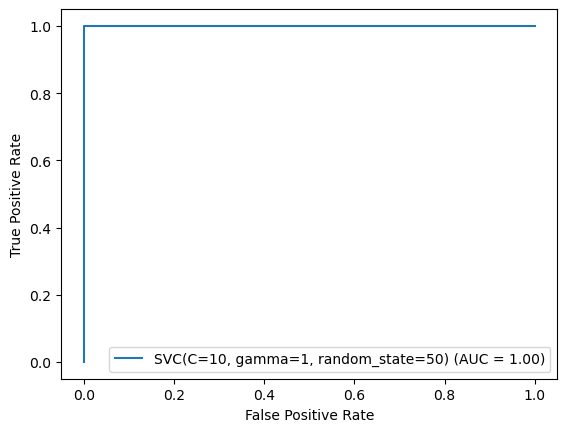

In [112]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# Saving the model

In [113]:
joblib.dump(final_model,'Bank Marketing Project.pkl')

['Bank Marketing Project.pkl']

# Predicting the saved Model

In [115]:
model=joblib.load('Bank Marketing Project.pkl')

In [116]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [117]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


**Comparing the original and predicted one it gives 100% accuracy. Next, we will use our model to predict with the testing data (df_test)**

# Predicting on testing data

In [118]:
# Prediction on the testing data provided
prediction = model.predict(df_test)

df_final = df_test.copy()
df_final['subscribed'] = prediction

df_final.to_csv("bank_test_predicted_final.csv")
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-1.770139,1.522962,-0.458201,0.452163,0
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.760054,-0.992527,-0.458201,0.452163,0
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.531969,0.031534,0.829938,1.655383,-0.992527,-0.458201,0.452163,0
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.413763,-0.330440,0.829938,-1.031965,-0.019403,-0.458201,0.452163,0
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.588278,-0.992527,-0.458201,0.452163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.594357,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.314959,0.953721,-0.458201,0.452163,0
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.870912,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.249100,-0.992527,-0.458201,0.452163,0
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.133128,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.398032,-0.992527,-0.458201,0.452163,0
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,0.043941,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,0.044106,-0.019403,2.140126,-0.542830,0


# Conclusion

### The best model was Support Vector Machine Classifier